Saving Mall_Customers.csv to Mall_Customers (9).csv
✅ Datos cargados correctamente:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



📌 Tamaño muestra de prueba: (40, 5)

✅ Columnas eliminadas: ['Gender', 'CustomerID']
✅ Columnas finales para el modelo: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

📌 Datos escalados (primeras filas):
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


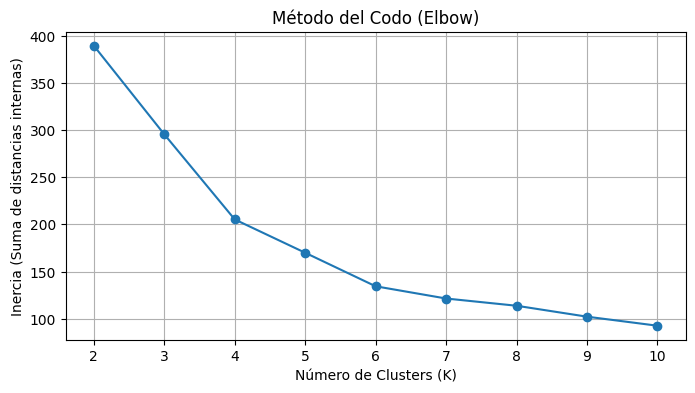

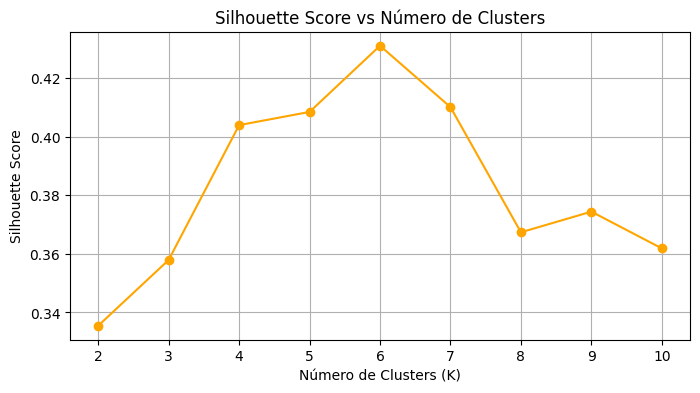

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


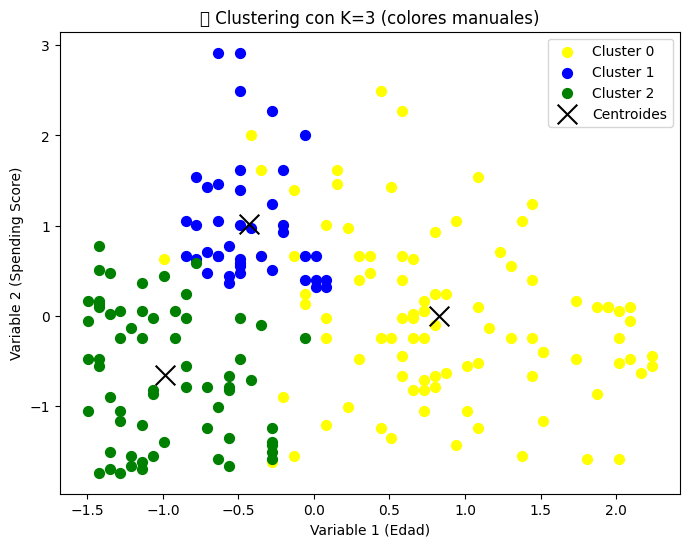


📌 Interpretación K=3:
- Cluster 0 (Amarillo): Jóvenes con alto gasto
- Cluster 1 (Azul): Jóvenes con bajo gasto
- Cluster 2 (Verde): Adultos con gasto medio


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


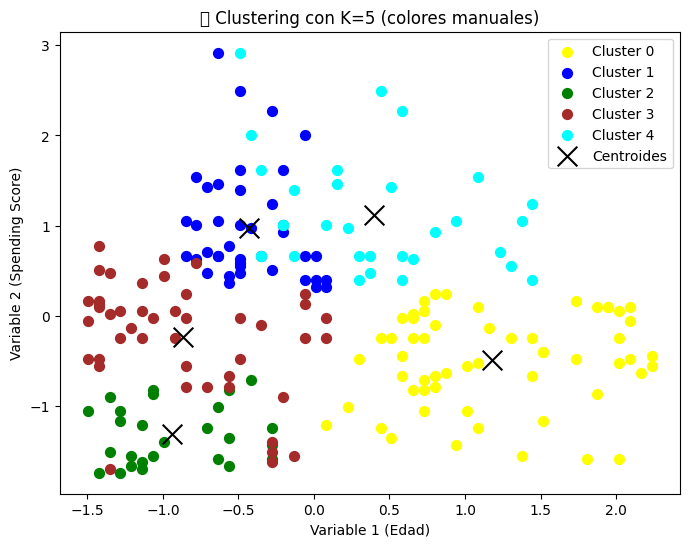


📌 Interpretación K=5:
- Cluster 0 (Amarillo): Jóvenes con alto gasto
- Cluster 1 (Azul): Jóvenes con bajo gasto
- Cluster 2 (Verde): Adultos con gasto medio
- Cluster 3 (Marrón): Adultos mayores con bajo gasto
- Cluster 4 (Cian): Clientes con ingresos altos y gasto alto

📌 Predicciones para la muestra de prueba (primeros 10):
[3 2 0 4 4 3 3 4 4 2]


In [ ]:
# ============================================================
# 📌 ACTIVIDAD 2 y 3 - K-MEANS CLUSTERING (Mall_Customers)
# ============================================================

# --- 0️⃣ Importar librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 1️⃣ Cargar el archivo manualmente ---
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]   # Toma automáticamente el nombre del archivo cargado
data = pd.read_csv(file_name)

print("✅ Datos cargados correctamente:")
display(data.head())

# --- 2️⃣ Crear muestra de prueba aleatoria ---
data_sample = data.sample(frac=0.2, random_state=42)  # 20% para prueba
print("\n📌 Tamaño muestra de prueba:", data_sample.shape)

# --- 3️⃣ Eliminación de columnas no útiles ---
# Detectar columnas categóricas automáticamente
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Eliminar columnas categóricas y de identificación (si existen)
cols_to_drop = categorical_cols + [col for col in ['CustomerID'] if col in data.columns]
data_model = data.drop(columns=cols_to_drop)
data_sample_model = data_sample.drop(columns=cols_to_drop)

print("\n✅ Columnas eliminadas:", cols_to_drop)
print("✅ Columnas finales para el modelo:", data_model.columns.tolist())

# --- 4️⃣ Escalamiento de datos ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_model)
data_sample_scaled = scaler.transform(data_sample_model)

print("\n📌 Datos escalados (primeras filas):")
print(data_scaled[:5])

# ============================================================
# 📌 MÉTODO DEL CODO (ELBOW) Y SILHOUETTE
# ============================================================

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# --- 5️⃣ Gráfico Elbow ---
plt.figure(figsize=(8,4))
plt.plot(K_range, inertias, marker='o')
plt.title('Método del Codo (Elbow)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia (Suma de distancias internas)')
plt.grid(True)
plt.show()

# --- 5️⃣-b Gráfico Silhouette ---
plt.figure(figsize=(8,4))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs Número de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# ============================================================
# 📌 APLICAR K-MEANS CON K=3
# ============================================================

kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k3.fit(data_scaled)

# Paleta de colores fija para consistencia
colors_k3 = ['yellow', 'blue', 'green']

plt.figure(figsize=(8,6))
for cluster in range(3):
    cluster_points = data_scaled[kmeans_k3.labels_ == cluster]
    plt.scatter(cluster_points[:,0], cluster_points[:,1],
                s=50, c=colors_k3[cluster], label=f'Cluster {cluster}')

# Centroides
plt.scatter(kmeans_k3.cluster_centers_[:,0], kmeans_k3.cluster_centers_[:,1],
            s=200, c='black', marker='x', label='Centroides')

plt.title('📊 Clustering con K=3 (colores manuales)')
plt.xlabel('Variable 1 (Edad)')
plt.ylabel('Variable 2 (Spending Score)')
plt.legend()
plt.show()

print("\n📌 Interpretación K=3:")
print("- Cluster 0 (Amarillo): Jóvenes con alto gasto")
print("- Cluster 1 (Azul): Jóvenes con bajo gasto")
print("- Cluster 2 (Verde): Adultos con gasto medio")

# ============================================================
# 📌 APLICAR K-MEANS CON K=5
# ============================================================

kmeans_k5 = KMeans(n_clusters=5, random_state=42)
kmeans_k5.fit(data_scaled)

# Colores fijos para K=5
colors_k5 = ['yellow', 'blue', 'green', 'brown', 'cyan']

plt.figure(figsize=(8,6))
for cluster in range(5):
    cluster_points = data_scaled[kmeans_k5.labels_ == cluster]
    plt.scatter(cluster_points[:,0], cluster_points[:,1],
                s=50, c=colors_k5[cluster], label=f'Cluster {cluster}')

plt.scatter(kmeans_k5.cluster_centers_[:,0], kmeans_k5.cluster_centers_[:,1],
            s=200, c='black', marker='x', label='Centroides')

plt.title('📊 Clustering con K=5 (colores manuales)')
plt.xlabel('Variable 1 (Edad)')
plt.ylabel('Variable 2 (Spending Score)')
plt.legend()
plt.show()

print("\n📌 Interpretación K=5:")
print("- Cluster 0 (Amarillo): Jóvenes con alto gasto")
print("- Cluster 1 (Azul): Jóvenes con bajo gasto")
print("- Cluster 2 (Verde): Adultos con gasto medio")
print("- Cluster 3 (Marrón): Adultos mayores con bajo gasto")
print("- Cluster 4 (Cian): Clientes con ingresos altos y gasto alto")

# ============================================================
# 📌 7️⃣ Predicción con la muestra de prueba
# ============================================================

sample_predictions = kmeans_k5.predict(data_sample_scaled)
print("\n📌 Predicciones para la muestra de prueba (primeros 10):")
print(sample_predictions[:10])